In [1]:
import plotly.express as px
import plotting_utils as pu
import glob
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
def example_plot(ax, fontsize=12, hide_labels=False):
    pc = ax.pcolormesh(np.random.randn(30, 30), vmin=-2.5, vmax=2.5)
    if not hide_labels:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)
    return pc


def read_and_melt(metric_file, dataset):
    df = pd.read_csv(metric_file, sep="\t")
    df_melt = pd.melt(df, id_vars=["Resolution [mm]", 
                                       "Structures", "Net", "Mode",
                                      #"age [weeks]"
                                      ], 
        value_vars=["DSC", "ASD [mm]"], 
        var_name="Metric", value_name='Value', 
        col_level=None, ignore_index=True)
    df_melt["Dataset"] = dataset
    df_melt["Metric_Mode"] = df_melt["Metric"] + df_melt["Mode"]
    return df_melt

In [54]:
mfile_feta = "/projects/datasets/FETA/FastSurfer/eval_metrics/figFETA_DSC_ASD.tsv" #MCRIB/VINN" # master-theses/henschell/FastInfantSurfer/experiments"#"/autofs/vast/lzgroup/Projects/"
mfile_mcrib = "/projects/datasets/MCRIB/VINN/eval_metrics/figMCRIB_DSC_ASD.tsv" 
mfile_dhcp = "/projects/master-theses/henschell/FastInfantSurfer/experiments/metric_overview/figdHCP_DSC_ASD.tsv"#"/autofs/vast/lzgroup/Projects/"

feta = read_and_melt(mfile_feta, "FETA")
mcrib = read_and_melt(mfile_mcrib, "MCRIB")
dhcp = read_and_melt(mfile_dhcp, "dHCP")

df_val = pd.concat([feta, mcrib, dhcp], axis=0)
print(df_val.head())
print(np.unique(df_val["Dataset"]))
print(np.unique(df_val["Net"]))

   Resolution [mm] Structures                Net Mode Metric      Value  \
0              0.5    Average              VINNA   T2    DSC  73.715438   
1              0.5    Average        VINNA + Aug   T2    DSC  80.846230   
2              0.5    Average  VINNA + SynthFull   T2    DSC  79.812563   
3              0.5    Average   VINNA + SynthMix   T2    DSC  81.091075   
4              0.5    Average              VINNA   T2    DSC  30.520282   

  Dataset Metric_Mode  
0    FETA       DSCT2  
1    FETA       DSCT2  
2    FETA       DSCT2  
3    FETA       DSCT2  
4    FETA       DSCT2  
['FETA' 'MCRIB' 'dHCP']
['VINNA' 'VINNA + Aug' 'VINNA + SynthFull' 'VINNA + SynthMix' 'dhcp'
 'ibeat' 'nnUNet2D' 'nnUNet3D']


In [2]:
# load the data(Validation, all networks, structures, modes, metrics)
base_dir="/groups/ag-reuter/projects/master-theses/henschell/FastInfantSurfer/experiments" #datasets/MCRIB/VINN" # "/autofs/vast/lzgroup/Projects/"
df_val = pd.read_csv(base_dir + "/metric_overview/figTest_DSC_ASD.tsv", #"/eval_metrics/figMCRIB_DSC_ASD.tsv", #figVal_DSC_ASD.tsv", "
                 sep="\t")
df_val.tail()


,SubjectName,Net_type,Structures,DSC,Res,Mode,Aug,Net,ASD [mm],Resolution [mm],Path,SubjectFix,scan_age,sex,age [weeks]
130195,sub-CC01234AN14_ses-155030,nnUNet3D_NoAug_T2,Superior_temporal_gyrus_posterior_part_WM,89.684762,10,T2,NoAug,nnUNet3D,0.224782,1.0,/groups/ag-reuter/projects/datasets/dHCP/Data/...,sub-CC01234AN14_ses-155030,33.29,female,<36
130196,sub-CC01234AN14_ses-155030,nnUNet3D_NoAug_T2,Thalamus,95.606984,10,T2,NoAug,nnUNet3D,0.148266,1.0,/groups/ag-reuter/projects/datasets/dHCP/Data/...,sub-CC01234AN14_ses-155030,33.29,female,<36
130197,sub-CC01234AN14_ses-155030,nnUNet3D_NoAug_T2,Thalamus_high_intensity_part_in_T2,94.707599,10,T2,NoAug,nnUNet3D,0.158913,1.0,/groups/ag-reuter/projects/datasets/dHCP/Data/...,sub-CC01234AN14_ses-155030,33.29,female,<36
130198,sub-CC01234AN14_ses-155030,nnUNet3D_NoAug_T2,Thalamus_low_intensity_part_in_T2,83.582336,10,T2,NoAug,nnUNet3D,0.208227,1.0,/groups/ag-reuter/projects/datasets/dHCP/Data/...,sub-CC01234AN14_ses-155030,33.29,female,<36
130199,sub-CC01234AN14_ses-155030,nnUNet3D_NoAug_T2,White Matter,97.714506,10,T2,NoAug,nnUNet3D,0.081135,1.0,/groups/ag-reuter/projects/datasets/dHCP/Data/...,sub-CC01234AN14_ses-155030,33.29,female,<36


In [4]:
df_val_melt = pd.melt(df_val, id_vars=["Resolution [mm]", 
                                       "Structures", "Net", "Mode",
                                      "age [weeks]"
                                      ], 
        value_vars=["DSC", "ASD [mm]"], 
        var_name="Metric", value_name='Value', 
        col_level=None, ignore_index=True)
df_val_melt["Metric_Mode"] = df_val_melt["Metric"] + df_val_melt["Mode"]
df_val_melt.head()
df_val_melt["Net"] = df_val_melt["Net"].apply(lambda x: rename_nets(x))

In [3]:
def rename_nets(row):
    if row == "CNN + extAug":
        new = "2.5D CNN* + exA"
    elif row == "VINN + intAug":
        new = "2.5D VINNA"
    elif row == "VINNA":
        new = "2.5D VINNA"
    elif row == "VINN + extAug":
        new = "2.5D VINN + exA"
    elif row == "VINN + intAug + extAug":
        new = "2.5D VINNA + exA"
    elif row == "ibeat":
        new = "iBEAT"
    elif row == "dhcp":
        new = "dHCP"
    elif row == "nnUNet2D":
        new = "2D nnUNet + exA"
    elif row == "nnUNet3D":
        new = "3D nnUNet + exA"
    else:
        new = row
    return new


['2.5D CNN* + exA' '2.5D VINNA' '2D nnUNet + exA' '3D nnUNet + exA'
 'iBEAT' 'infantFS']
3


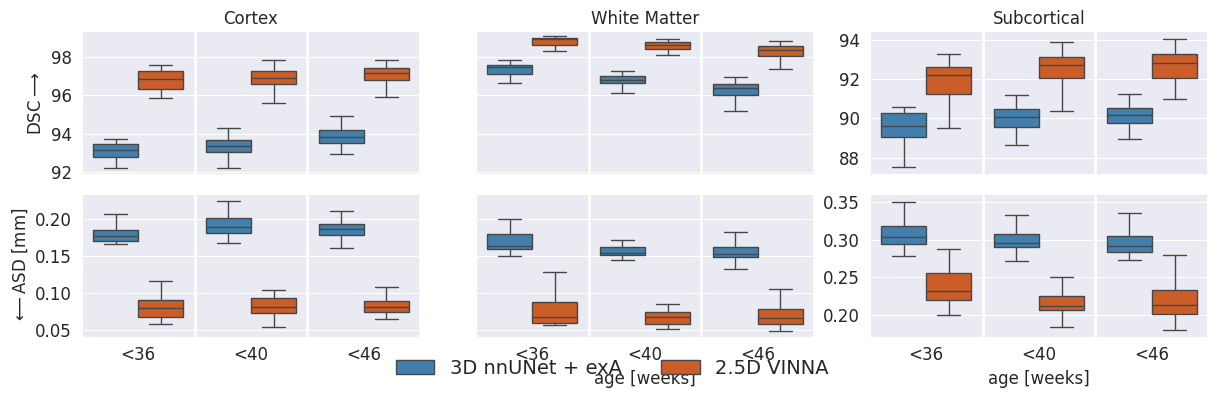

In [11]:

df_val_melt["Dataset"] = "dHCP"
df_val_melt["Net"] = df_val_melt["Net"].apply(lambda x: rename_nets(x))
df_val_melt = df_val_melt[df_val_melt["age [weeks]"] != "<32"]

print(np.unique(df_val_melt["Net"]))

analysis = "test_dl_age" #"test_ibeat"
base_dir = "/groups/ag-reuter/projects/master-theses/henschell/FastInfantSurfer/experiments"
catp_t2 = get_seaborn_figure(df_val_melt, 
                               struct=struct_to_plot[analysis],
                               res=res_to_plot[analysis],
                               nets=nets[analysis], #
                               mode=["T2", "T1"],
                               ds=datasets[analysis],
                               metric="Value",
                               metric_sel=metric_sel[analysis],
                               pal=pal[analysis][1:],
                               height=2, width=3.5, legend_out=True, #3.5
                               share_wm_gm_only=True, ylim_asd=[0, 0, 0, 0],
                               x_var="age [weeks]", #"Resolution [mm]", #"Dataset", #
                               colsel="Structures")

sns.move_legend(
    catp_t2, "lower center", fontsize=14,
    bbox_to_anchor=(.5, 0), ncol=5, title=None, frameon=False,
)

catp_t2.figure.savefig(base_dir + f"/figures/figNew_{analysis}.svg")


In [22]:
print(np.unique(df_val_melt["Net"]))
df_val_melt.columns

['2.5D CNN* + exA' '2.5D VINN + exA' '2.5D VINNA' '2.5D VINNA + exA']


Index(['Resolution [mm]', 'Structures', 'Net', 'Mode', 'Metric', 'Value',
       'Metric_Mode', 'Dataset'],
      dtype='object')

In [8]:
struct_to_plot = {"val": ["Cortex", "White Matter", "Subcortical"],
                  "test_dl": ["Cortex", "White Matter", "Subcortical"],
                  "test_dl_age": ["Cortex", "White Matter", "Subcortical"],
                  "test_ibeat": ["Cortex", "White Matter", "CSF"], #, "CSF"],
                  "test_fs": ["Cortex", "White Matter", "Amygdala", "Hippocampus"],
                  "test_mcrib": ["Cortex", "White Matter", "Lateral-Ventricle", "Hippocampus"],
                  "test_feta": ["Cortex", "White Matter", "Brainstem", "CSF",
                                "Lateral-Ventricle", "Thalamus", "Cerebellum"]
                 }

metric_sel = {"val": ["DSCT2", "ASD [mm]T2"], #, "DSCT1", "ASD [mm]T1"],
             "test_dl": ["DSCT2", "ASD [mm]T2", "DSCT1", "ASD [mm]T1"],
              "test_dl_age": ["DSCT2", "ASD [mm]T2"],
             "test_ibeat": ["DSCT2", "ASD [mm]T2"],
             "test_fs": ["DSCT1", "ASD [mm]T1"],
              "test_mcrib": ["DSCT2", "ASD [mm]T2"],
              "test_feta": ["DSCT2", "ASD [mm]T2"]
        }
#"Hippocampus", "Amygdala"]
res_to_plot = {"val": [0.5, 0.8, 1.0],
        "test_dl": [0.5, 0.8, 1.0],
               "test_dl_age": [0.5],
        "test_ibeat": [0.5],
        "test_fs": [1.0],
        "test_mcrib": [0.5],
               "test_feta": [0.5],
               
              }

nets = {"val": ["2.5D CNN* + exA", "2.5D VINN + exA", "2.5D VINNA", "2.5D VINNA + exA"],
        "test_dl": ["2D nnUNet + exA", "3D nnUNet + exA", "2.5D VINNA"], #"nnUNet2D", "2D nnUNet + exA", 
        "test_dl_age": ["3D nnUNet + exA", "2.5D VINNA"],
        "test_ibeat": ["iBEAT", "3D nnUNet + exA", "2.5D VINNA"],
        "test_fs": ["infantFS", "3D nnUNet + exA", "2.5D VINNA"],
       "test_mcrib": ["3D nnUNet + exA", "2.5D VINNA + Aug", "dHCP"],#"VINNA + SynthMix", "VINNA + SynthFull"],
       "test_feta": ["VINNA", "VINNA + Aug", "VINNA + SynthMix", "VINNA + SynthFull"]}

datasets = {"val": ["dHCP"], "test_dl": ["dHCP"], "test_dl_age": ["dHCP"],
            "test_ibeat": ["dHCP"],"test_fs": ["dHCP"], "test_mcrib": ["MCRIB"], "test_feta": ["FETA"]}
#"ibeat_NoAug_T2", "FS_NoAug_T1", "nnUNet2D_NoAug_T1", 
# "nnUNet3D_NoAug_T1", "FastSurferDDB_RotTLScale_T1", 
# "All FastSurferDDB NoAug", "FastSurferVINN_RotTLScale_T1", 
# "FastSurferVINN_LatentAug_T1", 

mode = ["T1", "T2"]
pal = {"val": ["#fee6ce", "#fdae6b", "#e6550d", "#d5b386ff", "#ffffff"],
       "test_dl": ["#deebf7", "#3182bd",  "#e6550d",], #"#fee6ce",
       "test_dl_age": ["#deebf7", "#3182bd",  "#e6550d",], 
       "test_ibeat": ["#bdbdbd", "#3182bd", "#e6550d"], # "#deebf7", 2D, "#fee6ce", CNN
       "test_fs": ["#bdbdbd", "#3182bd", "#e6550d"],
       "test_mcrib": ["#bdbdbd", "#deebf7", "#3182bd", "#fee6ce", "#e6550d",],
       "test_feta": ["#deebf7", "#3182bd", "#fee6ce", "#e6550d",]
      }

limit= {"ASD [mm]": (0, 0.8), "DSC": (60, 100)}

val_pal = ["#fee6ce", "#fdae6b", "#e6550d", "#d5b386ff", "#ffffff"]

In [40]:
def get_seaborn_figure2(df, struct, res, nets, mode, pal, metric,
                        met_sel=["DSCT2", "DSCT1", "ASD [mm]T2", "ASD [mm]T1"],
                       row_names=["DSC", "ASD [mm]"],
                       height=8.27, width=11.7):
    # select parts of interest
    filternet=  (df["Resolution [mm]"].isin(res)) \
              & (df["Structures"].isin(struct)) \
              & (df["Net"].isin(nets))  \
              & (df["Mode"]).isin(mode) \
              & (df["Metric_Mode"].isin(met_sel))

    # Create boxplot
    boxp = sns.catplot(data=df[filternet], x="Resolution [mm]", y=metric, 
                       hue="Net", col="Metric_Mode",
                       row="Structures",
                       palette=pal, 
                       sharey="row", #"row", 
                       sharex="col",
                       hue_order=nets,
                       col_order=met_sel,
                       kind="box", legend_out=False, 
                       showfliers=False, linewidth=1,
                       height=height, aspect=width/height)

    # calculate number of columns and create white lines
    lim = 0.5 * len(struct)
    for line in [0.5, lim]:#, 2.5, 3.5, 4.5]:
        boxp.refline(x=line, color = "white", lw = 2, linestyle='-')
    
    # Change subplot column names
    boxp.set_titles(template='{row_name}', size=12)
    
    # Change subplot col names
    for row in range(0, len(struct)):
        for col in range(0, len(met_sel)):
            if col<2 and col%2 == 0:
                boxp.axes[row][col].set_ylabel(r'$\longleftarrow$' + row_names[1], size=12) #set_ylabel(row_names[0] + r'$\longrightarrow$',size=12)
            elif col > 1 and col%2 == 0:
                boxp.axes[row][col].set_ylabel(r'$\longleftarrow$' + row_names[1], size=12)
    
    for ax in boxp.axes.flatten():
        ax.xaxis.label.set_size(12)
        ax.yaxis.label.set_size(12)
        ax.yaxis.set_tick_params(labelsize = 12)
        ax.xaxis.set_tick_params(labelsize = 12)
    
    return boxp
 

/home/henschell/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


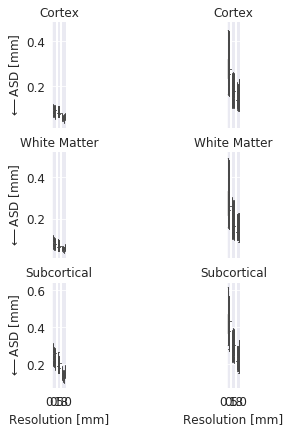

In [41]:
analysis = "val"
catp_test = get_seaborn_figure2(df_val_melt, 
                               struct=struct_to_plot[analysis],
                               res=res_to_plot[analysis],
                               nets=nets[analysis],
                               mode=["T2", "T1"],
                               metric="Value", met_sel = ["ASD [mm]T2", "ASD [mm]T1"],
                               row_names=["DSC", "ASD [mm]"],
                               pal=pal[analysis],
                               height=2, width=5/2)


#catp_test.figure.savefig(base_dir + "/figures/fig1_ablation_asd_new_v2.svg")

In [6]:
def get_seaborn_figure(df, struct, res, nets, mode, ds, pal, metric, 
                       x_var ="Resolution [mm]", colsel="Structures",
                       metric_sel=["DSCT2", "ASD [mm]T2", "DSCT1", "ASD [mm]T1"],
                       row_names=["DSC", "ASD [mm]"], legend_out=False, share_wm_gm_only=False,
                       height=8.27, width=11.7, ylim_asd=[1.0, 1.0]):
    # select parts of interest
    filternet=  (df["Resolution [mm]"].isin(res)) \
              & (df["Structures"].isin(struct)) \
              & (df["Net"].isin(nets))  \
              & (df["Mode"]).isin(mode) \
              & (df["Dataset"]).isin(ds)
     
    order_dict = {"age [weeks]": ["<36", "<40", "<46"], "Mode": mode,
                 "Resolution [mm]": res, "Structures": struct, "Net": nets, None: None,
                 "Dataset": ds}

    # Create boxplot
    boxp = sns.catplot(data=df[filternet], x=x_var, y=metric, 
                       order=order_dict[x_var],
                       hue="Net", col=colsel,
                       row="Metric_Mode",
                       palette=pal, 
                       sharey=False, #"row", #"row", #"row", #"row", 
                       sharex="col",
                       hue_order=nets,
                       row_order=metric_sel,
                       col_order=struct,
                       kind="box", legend_out=legend_out, 
                       showfliers=False,
                       height=height, aspect=width/height)

    # calculate number of columns and create white lines
    print(len(np.unique(df[x_var])))
    lim = 0.5 * len(np.unique(df[x_var])) + 1
    #print(lim)
    for line in np.arange(0.5, lim + 0.5, 1):#, 2.5, 3.5, 4.5]:
        boxp.refline(x=line, color = "white", lw = 2, linestyle='-')
    
    # Change subplot column names
    if colsel is not None:
        boxp.set_titles(template='{col_name}', size=12)
    
    # Change subplot row names
    for p in range(0, len(metric_sel)):
        if p%2 == 0:
            boxp.axes[p][0].set_ylabel(row_names[0] + r'$\longrightarrow$',size=12)
            #boxp.axes[p][0].set_ylim(40, 100) #1.8)
        else:
            boxp.axes[p][0].set_ylabel(r'$\longleftarrow$' + row_names[1], size=12)
            if np.sum(ylim_asd) != 0:
                for sub in range(len(struct)):
                    # set ylim for ASD
                    boxp.axes[p][sub].set_ylim(0, ylim_asd[sub]) #1.8)
            boxp.axes[p]
        if colsel is not None:
            for i in [0]:#, 2]:
                boxp.axes[p][i].set_xlabel("")
        
            if p > 0:
            # Remove colnames inbetween plots and shrink size
                for ax in boxp.axes[p].flatten():
                    ax.set_title("", size=1)
        
        if share_wm_gm_only:
            # get gm-wm ylim
            ylim_gm = boxp.axes[p][0].get_ylim()
            ylim_wm = boxp.axes[p][1].get_ylim()    
            ylim_new = (min(ylim_gm[0], ylim_wm[0]), max(ylim_gm[1], ylim_wm[1]))
            
            # set limit to new values
            boxp.axes[p][0].set_ylim(bottom=ylim_new[0], top=ylim_new[1])
            boxp.axes[p][1].set_ylim(bottom=ylim_new[0], top=ylim_new[1])
            
            # remove scale for second column
            boxp.axes[p][1].set_yticklabels("")
    
    boxp.fig.subplots_adjust(hspace=0.1)
    boxp.fig.tight_layout()
    
    for i, ax in enumerate(boxp.axes.flatten()):
        ax.xaxis.label.set_size(12)
        ax.yaxis.label.set_size(12)
        ax.yaxis.set_tick_params(labelsize = 12)
        ax.xaxis.set_tick_params(labelsize = 12)
    
    return boxp
   

In [42]:
analysis = "val"
struct=struct_to_plot[analysis],
res=res_to_plot[analysis],
net_sel=nets[analysis],
mode=mode
ds = datasets[analysis]

print(struct, res, net_sel, mode, ds)
filternet=  (df_val_melt["Resolution [mm]"].isin(res)) \
              & (df_val_melt["Structures"].isin(struct)) \
              & (df_val_melt["Net"].isin(net_sel))  \
              & (df_val_melt["Mode"]).isin(mode) \
              & (df_val_melt["Dataset"]).isin(ds)
print(df_val_melt[filternet].head())

boxp = sns.catplot(data=df_val_melt[filternet], x="Structures", y="Value", 
                       hue="Net", 
                       col="Metric_Mode", 
                       sharey=False,#"row", #"row", 
                       sharex=False, #"col",
                       #hue_order=nets,
                       #row_order=metric_sel,
                       kind="box", legend_out=True, 
                       showfliers=False,
                       height=2, aspect=3.5/2)

(['Cortex', 'White Matter', 'Subcortical'],) ([0.5, 0.8, 1.0],) (['2.5D CNN* + exA', '2.5D VINN + exA', '2.5D VINNA', '2.5D VINNA + exA'],) ['T1', 'T2'] ['dHCP']
Empty DataFrame
Columns: [Resolution [mm], Structures, Net, Mode, Metric, Value, Metric_Mode, Dataset]
Index: []


ValueError: min() arg is an empty sequence

In [33]:
nets["val"]

['2.5D CNN* + exA', '2.5D VINN + exA', '2.5D VINNA', '2.5D VINNA + exA']

In [26]:
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 1)

catp_t2 = get_seaborn_figure(df_val_melt, 
                               struct=struct_to_plot,
                               res=res_to_plot,
                               nets=nets,
                               mode=["T2"],
                               metric="Value",
                               pal=val_pal,
                               height=2, width=3.5)

catp_t1 = get_seaborn_figure(df_val_melt, 
                               struct=struct_to_plot,
                               res=res_to_plot,
                               nets=nets,
                               mode=["T1"],
                               metric="Value",
                               pal=val_pal,
                               height=2, width=3.5)

mg0 = SeabornFig2Grid(catp_t2, fig, gs[0])
mg1 = SeabornFig2Grid(catp_t1, fig, gs[1])

gs.tight_layout(fig)

TypeError: get_seaborn_figure() missing 1 required positional argument: 'ds'

<Figure size 720x576 with 0 Axes>

['Cortex']
                   SubjectName                      Net_type Structures  \
163  sub-CC00057XX08_ses-11002   FastSurferDDB_RotTLScale_T2     Cortex   
214  sub-CC00057XX08_ses-11002   FastSurferDDB_RotTLScale_T2     Cortex   
265  sub-CC00057XX08_ses-11002   FastSurferDDB_RotTLScale_T2     Cortex   
622  sub-CC00057XX08_ses-11002   FastSurferVINN_LatentAug_T2     Cortex   
673  sub-CC00057XX08_ses-11002  FastSurferVINN_RotTLScale_T2     Cortex   

           DSC  Res Mode         Aug            Net  ASD [mm]  Resolution [mm]  
163  96.019512    5   T2  RotTLScale   CNN + extAug  0.132750              0.5  
214  94.265934    8   T2  RotTLScale   CNN + extAug  0.103849              0.8  
265  95.002849   10   T2  RotTLScale   CNN + extAug  0.074155              1.0  
622  96.257402    5   T2   LatentAug  VINN + intAug  0.138963              0.5  
673  96.225012    5   T2  RotTLScale  VINN + extAug  0.109655              0.5  
['White Matter']
                   SubjectName     

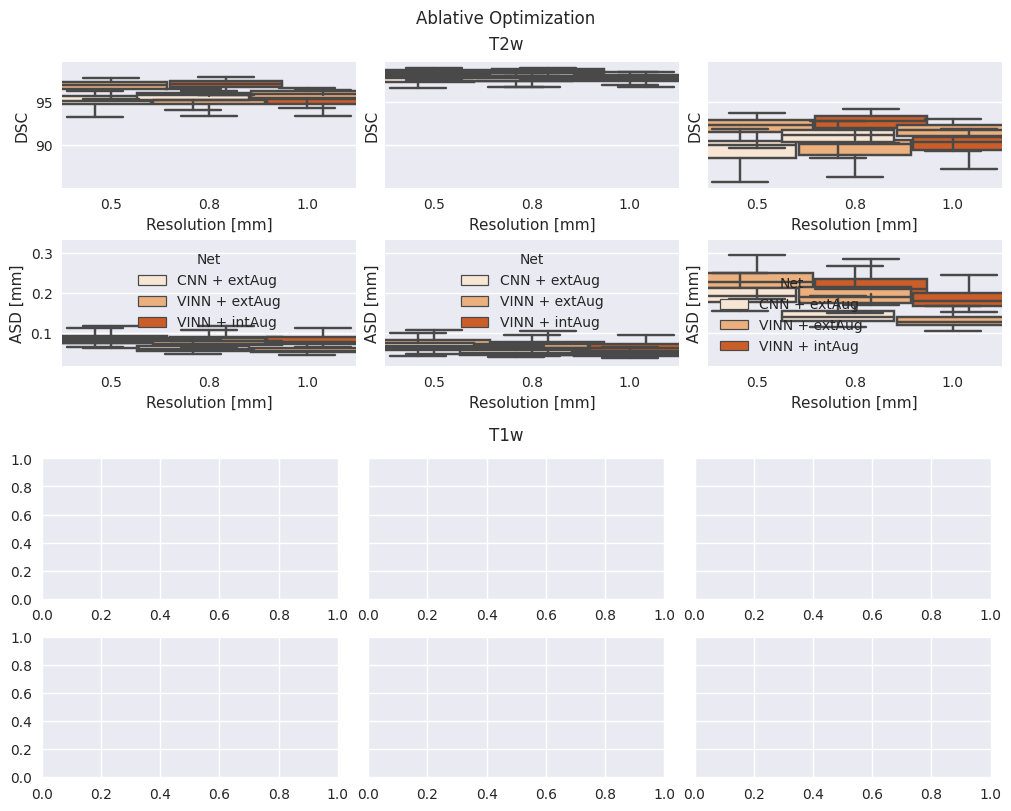

In [181]:


# Define the figure
fig = plt.figure(layout='constrained', figsize=(10, 8))

# Figure Title
fig.suptitle('Ablative Optimization')

# Define number of subfigures (rows, columns, space between them)
subfigs = fig.subfigures(2, 1, wspace=0.07)

# Define colors and title of the subplots
subfigs[0].set_facecolor('white')
subfigs[0].suptitle('T2w') # subfigs[0]

# select parts of interest
filternet =  (df_val["Resolution [mm]"].isin(res_to_plot)) \
              & (df_val["Structures"].isin(struct_to_plot)) \
              & (df_val["Net"].isin(nets))  \
              & (df_val["Mode"]).isin(["T2"])
df_t2 = df_val[filternet]
    
# Define sub-subplots of top figure
axsnest0 = subfigs[0].subplots(2, 3, sharey="row")
dsc_plots, asd_plots = [], []
for i in range(3):
    df_struct = df_t2[df_t2["Structures"]==struct_to_plot[i]]
    print(np.unique(df_struct["Structures"]))
    print(df_struct.head())
    dsc_plots.append(sns.boxplot(data=df_struct, 
                x="Resolution [mm]", y="DSC", 
                hue="Net", hue_order=nets, 
                palette=val_pal, saturation=0.75, 
                width=3.5, #aspect=3.5/2, dodge=True, 
                showfliers=False, linewidth=None, 
                whis=1.5, ax=axsnest0[0][i]))
    axsnest0[0][i].get_legend().remove()
    
    asd_plots.append(sns.boxplot(data=df_struct, 
                x="Resolution [mm]", y="ASD [mm]", 
                hue="Net", hue_order=nets, 
                palette=val_pal, saturation=0.75, 
                width=3.5, #aspect=3.5/2, dodge=True, 
                showfliers=False, linewidth=None, 
                whis=1.5, ax=axsnest0[1][i]))

subfigs[1].set_facecolor('white')
subfigs[1].suptitle('T1w') # subfigs[1]
axsnest0 = subfigs[1].subplots(2, 3, sharey=True)


plt.show()

In [11]:
class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())